In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

In [2]:
data = open("file.txt", "r", encoding="utf-8")
data = data.read()

In [3]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [4]:
seg_list = jieba.cut(data, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.cache
Loading model cost 0.779 seconds.
Prefix dict has been built succesfully.


Default Mode: 
/ 
/  /  /  / 
/ 
/ -/  / 113/  / -/  /  /  / 
/ 
/  /  / 
/ 東元/ 電機/ 股份/ 有限公司/  /  / 
/ 個/  / 體/  / 財/  / 務/  / 報/  / 表/  / 附/  / 註/  /  / 
/ 型型/  /  /  / 
/ 單位/ ：/ 新台幣/ 仟/ 元/  / 
/ 校/  / 
/ 一/ 、/ 公司/ 沿革/  /  / 
/ 董致/  / 災/ 
/ 設/ 立/ 。/ 主要/ 經營/ 之業務為/ ：/ 各種/ 機械/ 設備/  / 致董/ 董董/ 
/ 機械/ 、/ 電器/ 及視/ 聽/ 電子/ 產品/ 、/ 有線/ 及/ 無線/  / 董/ 
/ 災型/ 董/ 
/ 機/ 股份/ 有限公司/ 為/ 消滅/ 公司/ 。/ 另本/ 公司/ 於/ 民國/  / 董致/ 
/ 及/ 東台/ 科技股份/ 有限公司/ 合/ 併/ ，/ 本/ 公司/ 為/  / 董致/ 
/ 東台/ 科技股份/ 有限公司/ 為/ 消滅/ 公司/ 。/  / 
/ 二/ 、/ 通過/ 財務/ 報告/ 之/ 日期/ 及/ 程序/  /  / 
/ 致/  / 
/ 三/ 、/ 新/ 發布及/ 修訂/ 準則/ 及/ 解釋/ 之/ 適用/  /  / 
/ 災致/  /  / 
/ 國際/ 財務/ 報導/ 準則/ 之/ 影響/  /  / 
/ 適用/ 之國際/ 財務/ 報導/ 準則/ 之/ 新/ 發布/ 、/ 修/ 
/ 正及/ 修訂/ 之/ 準則/ 及/ 解釋/ ：/  /  / 
/  /  / 
/ 
/  / 新/ 發布/ // 修正/ // 修訂/ 準則/ 及/ 解釋/  / 
/ 致災/  / 
/ 發布/ 之/ 生效日/  / 
/ 董/  / 董致/ 董/ 
/ 正/ 「/ 投資個體/ ：/ 適用合/  / 併/ 報表/ 之/ 例/ 外規定/ 」/  / 
/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ 
/ 國際/ 財務/ 報導/ 準則/ 第/ 1/  / 修正/ 「/ 取得/ 聯/ 合營/ 運權/ 益/ 之會計/ 
/ 處/ 理/ 」/  / 
/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ 
/ 國際/ 財務/ 報導/ 準則/ 第/ 14/ 

In [5]:
new_data=""
for d in data:
    if is_chinese(d):
        new_data+=d

In [55]:
stopwords = ['日月','該','致','災致','致型','校董','董','董致','董型','按','與','其他','型','我', '對', '\n',"集團","股份","或","資產","有限公司","年度","公司","準則","註","之","及","於","年月日","年","月","日","民國","至","在","係","所","以","馬","可","金","包含","評估","第號","機","未","新","為","已","可能","時","解釋","支付","當現"]
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
word = ["或有負債","不動產廠房及設備","馬達","其他綜合損益","無形資產"]
for w in word:
    jieba.add_word(w, freq=None, tag=None)

In [56]:
seg_list = jieba.cut(new_data, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1

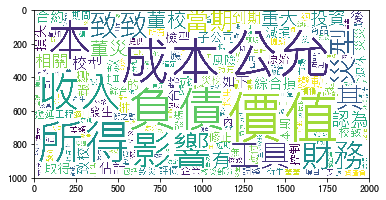

In [57]:
font = "msjh.ttc"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [58]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)

In [63]:
ten[:10]

[('價值', 75),
 ('公允', 64),
 ('成本', 58),
 ('負債', 54),
 ('所得', 50),
 ('本', 45),
 ('收入', 39),
 ('影響', 36),
 ('財務', 35),
 ('工具', 31)]

In [60]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])


In [61]:
import matplotlib
matplotlib.matplotlib_fname()

'D:\\python\\envs\\keras35\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

([<matplotlib.axis.XTick at 0x25b9ad777b8>,
 <a list of 10 Text xticklabel objects>)

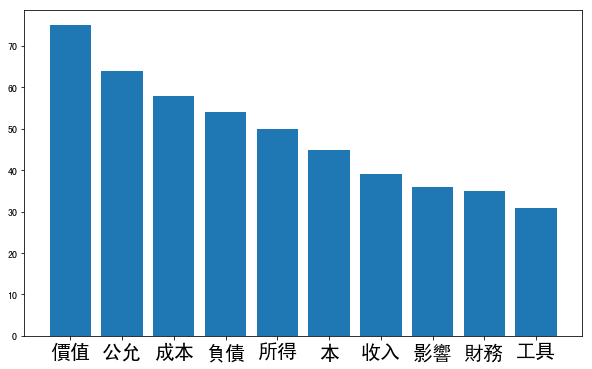

In [62]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # for Chinese characters
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)